Missing values in the dataset:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Evaluation Results:
Accuracy Score: 0.9589552238805971

Confusion Matrix:
 [[209   5]
 [  6  48]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.97       214
           1       0.91      0.89      0.90        54

    accuracy                           0.96       268
   macro avg       0.94      0.93      0.94       268
weighted avg       0.96      0.96      0.96       268



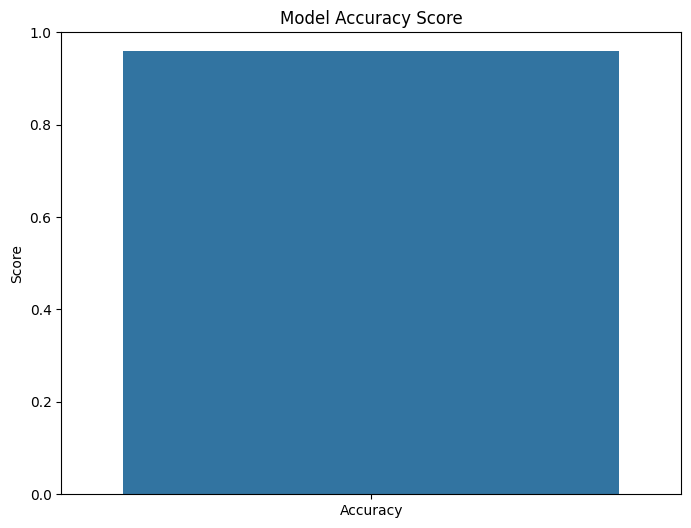

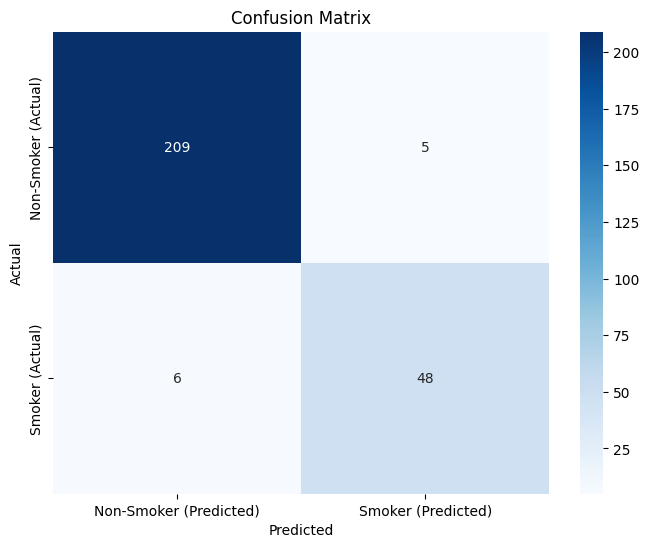

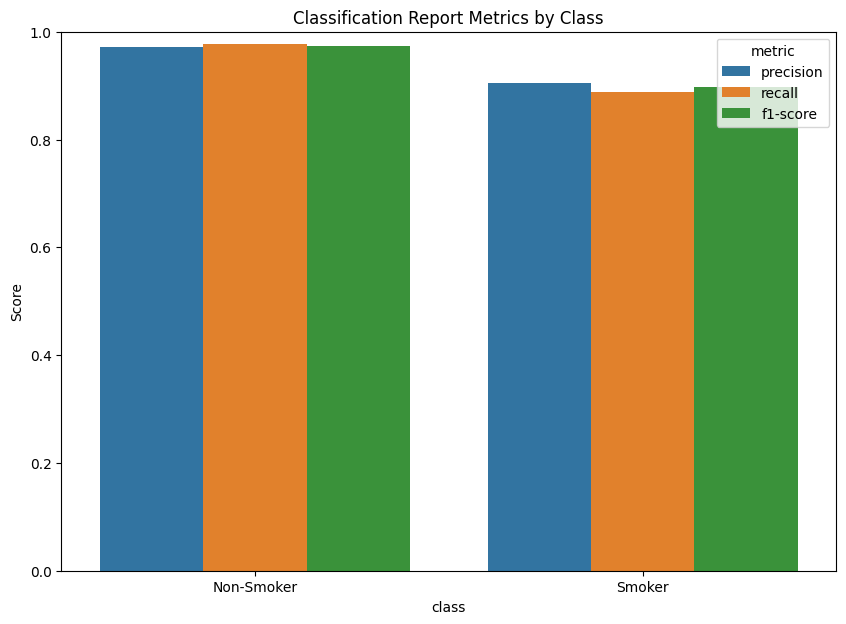

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Load the dataset
# Assuming 'insurance.csv' is in the same directory as the script
file = pd.read_csv("insurance.csv")

# 3. Check for missing values
print("Missing values in the dataset:")
print(file.isnull().sum())

# 4. Encode categorical variables
file['sex'] = file['sex'].map({'male': 0, 'female': 1})
file['smoker'] = file['smoker'].map({'no': 0, 'yes': 1})
file['region'] = file['region'].map({'southwest': 0, 'southeast': 1, 'northwest': 2, 'northeast': 3})

# 5. Define features and target
X = file.drop('smoker', axis=1)
y = file['smoker']

# 6. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 7. Initialize and train AdaBoost Classifier
model = AdaBoostClassifier(n_estimators=50, random_state=42)
model.fit(X_train, y_train)

# 8. Predict on test data
y_pred = model.predict(X_test)

# 9. Evaluate the model and print results
print("\nEvaluation Results:")
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# 10. Generate the plots and graphs

# Visualize Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.barplot(x=['Accuracy'], y=[accuracy])
plt.title('Model Accuracy Score')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.show()

# Visualize Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Smoker (Predicted)', 'Smoker (Predicted)'], yticklabels=['Non-Smoker (Actual)', 'Smoker (Actual)'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Visualize Classification Report
report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose().drop(columns=['support']).reset_index().rename(columns={'index': 'class'})
df_report_melted = df_report.melt(id_vars='class', var_name='metric', value_name='score')

# Filter out the 'accuracy' row which is not a class-specific metric and map the class labels
df_report_melted = df_report_melted[df_report_melted['class'].isin(['0', '1'])]
df_report_melted['class'] = df_report_melted['class'].map({'0': 'Non-Smoker', '1': 'Smoker'})

plt.figure(figsize=(10, 7))
sns.barplot(x='class', y='score', hue='metric', data=df_report_melted)
plt.title('Classification Report Metrics by Class')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.show()